# Avocado Prices Prediction
------

## Loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install fbprophet
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters() #This is use to avoid any error

In [3]:
dataset = pd.read_csv('path\\to\\your\\data folder\\avocado.csv',parse_dates=True)

In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
dataset.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13544,51,2016-01-03,1.63,8936.72,13.40,248.57,0.00,8674.75,8674.75,0.00,0.00,organic,2016,NorthernNewEngland
16725,23,2017-07-23,1.95,10503.59,159.08,5194.40,192.67,4957.44,4642.47,314.97,0.00,organic,2017,RaleighGreensboro
9198,20,2015-08-09,2.01,5579.38,2291.03,2855.35,0.00,433.00,49.96,383.04,0.00,organic,2015,Atlanta
3970,18,2016-08-21,0.93,3086167.04,1264167.99,480926.04,57962.68,1283110.33,1204789.47,43207.72,35113.14,conventional,2016,LosAngeles
9691,45,2015-02-15,1.64,4283.56,374.59,2597.56,0.00,1311.41,706.67,604.74,0.00,organic,2015,Columbus


## Sorting the row by date

In [7]:
dataset = dataset.sort_values('Date')

## Using only date and average price as columns

In [13]:
dataset_prophet = dataset.loc[:,['Date','AveragePrice']]
dataset_prophet.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [9]:
#This is an important step as facebook prophet use column name 'date' as 'ds' and 'prediction column' as 'y' hence, 
# hence we need to rename the columns 
dataset_prophet = dataset_prophet.rename(columns={'Date':'ds','AveragePrice':'y'}) 

## Model building

In [10]:
# By default seasonality_mode is set to 'additive', you can change this 'multiplicative' if your data doesn't have constant variation.
model = Prophet() 

In [11]:
model.fit(dataset_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = model.make_future_dataframe(periods=365) # need to define a dataframe for storing predictions
forecast = model.predict(future)

In [14]:
forecast.tail() # Forecast of 2019 will be created from previous data using additive model

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18609,2019-03-21,1.163836,0.582259,1.623336,0.981355,1.347806,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,0.0,0.0,0.0,1.077538
18610,2019-03-22,1.163109,0.558105,1.613992,0.979769,1.348072,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,0.0,0.0,0.0,1.078492
18611,2019-03-23,1.162382,0.554027,1.600665,0.978231,1.348338,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,0.0,0.0,0.0,1.079721
18612,2019-03-24,1.161655,0.531323,1.587284,0.976692,1.348729,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,0.0,0.0,0.0,1.081204
18613,2019-03-25,1.160928,0.550554,1.589200,0.975128,1.348992,-0.078014,-0.078014,-0.078014,-0.078014,-0.078014,-0.078014,0.0,0.0,0.0,1.082914


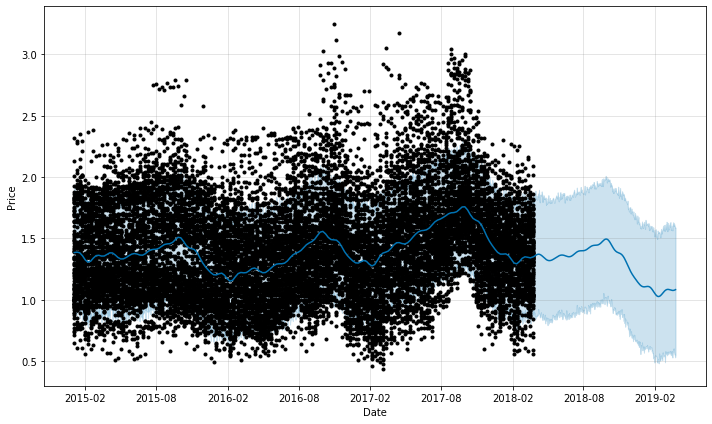

In [15]:
ploting = model.plot(fcst=forecast,xlabel='Date',ylabel='Price')

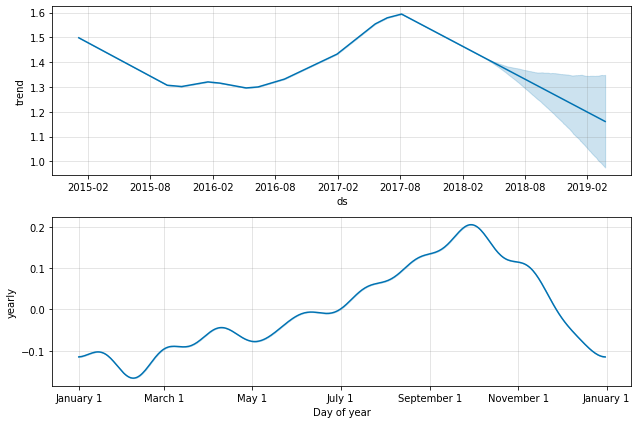

In [16]:
plot_component = model.plot_components(forecast)

## Part II

* What if you want to forecast according to different region, lets say where region is west

In [17]:
dataset2 = pd.read_csv('path\\to\\your\\data folder\\avocado.csv',parse_dates=True)

In [18]:
dataset2 = dataset2[dataset['region']=='West'][['Date','AveragePrice']]
dataset2.sort_values('Date',inplace=True)

C:\Users\Shehzada\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [19]:
dataset2.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)

In [20]:
model1 = Prophet()

In [21]:
model1.fit(dataset2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


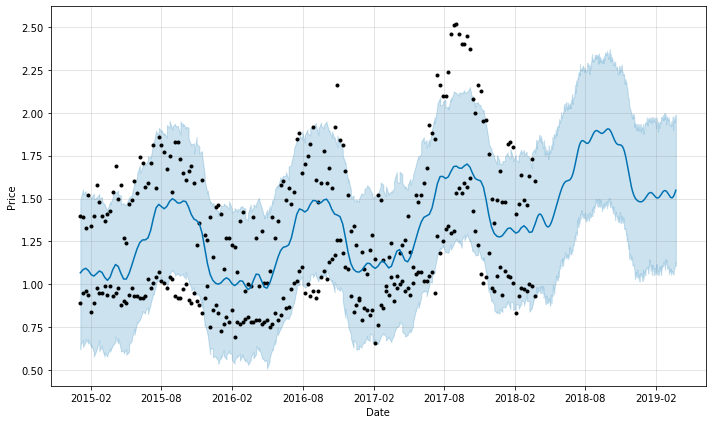

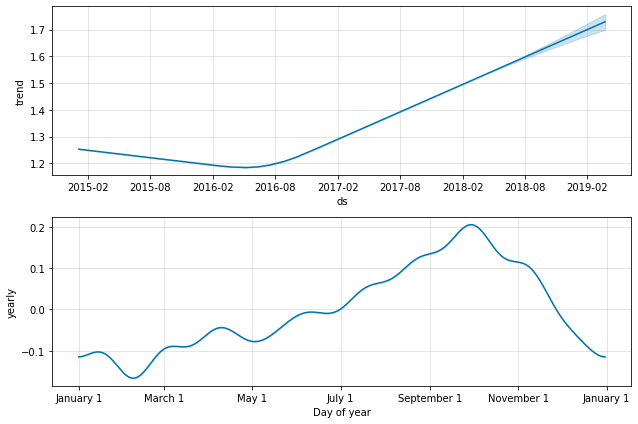

In [22]:
forecast_future_df = model1.make_future_dataframe(periods=365)
forecast = model1.predict(forecast_future_df)
fcst = model1.plot(forecast,xlabel='Date',ylabel='Price')
fsct_cmp = model.plot_components(forecast)